<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Подготовка-к-расчету-прибыли" data-toc-modified-id="Подготовка-к-расчету-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчету прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчет-прибыли-по-регионам" data-toc-modified-id="Расчет-прибыли-по-регионам-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчет прибыли по регионам</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.  
Шаги для выбора локации обычно такие:  
В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;  
Строят модель для предсказания объёма запасов в новых скважинах;    
Выбирают скважины с самыми высокими оценками значений;  
Определяют регион с максимальной суммарной прибылью отобранных скважин.  

**План выполнению проекта**  
Загрузим и подготовим данные. Поясним порядок действий.  
Обучим и проверим модель для каждого региона:  
2.1. Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.  
2.2. Обучим модель и сделем предсказания на валидационной выборке.  
2.3. Сохраним предсказания и правильные ответы на валидационной выборке.  
2.4. Напечатаем на экране средний запас предсказанного сырья и RMSE модели.  
2.5. Проанализируем результаты.  
Подготовимся к расчёту прибыли:      
3.1. Все ключевые значения для расчётов сохраним в отдельных переменных.    
3.2. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.  
3.3. Напишем выводы по этапу подготовки расчёта прибыли.  
Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:  
4.1. Выберем скважины с максимальными значениями предсказаний.  
4.2. Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.  
4.3. Рассчитаем прибыль для полученного объёма сырья.  
Посчитаем риски и прибыль для каждого региона:  
5.1. Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.  
5.2. Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.  
5.3. Напишем выводы: предложим регион для разработки скважин и обоснуем выбор.  
   


**Описание данных**  
id — уникальный идентификатор скважины    
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);  
product — объём запасов в скважине (тыс. баррелей). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Обзор данных

In [2]:
try:
    geo_0 =  pd.read_csv('geo_data_0.csv')
    geo_1 =  pd.read_csv('geo_data_1.csv')
    geo_2 =  pd.read_csv('geo_data_2.csv')
except:
    geo_0 =  pd.read_csv('/datasets/geo_data_0.csv')
    geo_1 =  pd.read_csv('/datasets/geo_data_1.csv')
    geo_2 =  pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# напишем функцию для обзора датасетов:
#она проверяет пропуски, дубликаты и выводит describe и диаграмму размаха
def review(df):
    print(f'Пропуски: {df.isna().sum()}')
    print('')
    print(f'Дубликаты: {df.duplicated().sum()}')
    print('')
    display(df.describe())
    df.plot(kind='box')
    plt.title('Диаграмма размаха в регионе')

Пропуски: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Дубликаты: 0



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


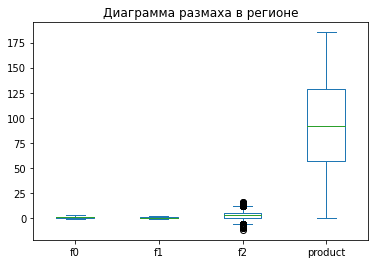

In [4]:
review(geo_0)

Пропуски: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Дубликаты: 0



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


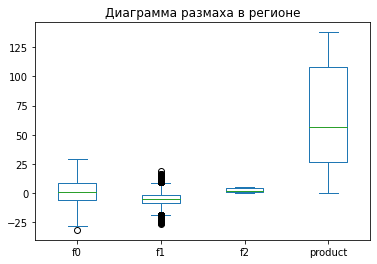

In [5]:
review(geo_1)

Пропуски: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Дубликаты: 0



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


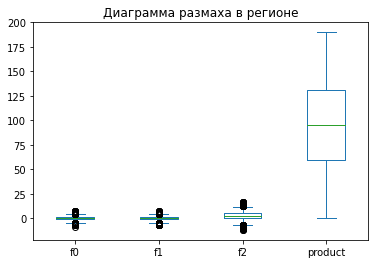

In [6]:
review(geo_2)

In [7]:
print(f" Пустых скважин в geo_0: {geo_0.query('product == 0')['product'].count()}")
print(f" Пустых скважин в geo_1: {geo_1.query('product == 0')['product'].count()}")
print(f" Пустых скважин в geo_2: {geo_2.query('product == 0')['product'].count()}")

 Пустых скважин в geo_0: 1
 Пустых скважин в geo_1: 8235
 Пустых скважин в geo_2: 1


### Вывод

Данные впорядке, предобработка не требуется. Непонятно, правда, насчет пустых скважин.

## Обучение модели

In [8]:
# Функция делит выборку на валидационную и обучающую, 
# скалирует её, обучает и выводит предсказания, rmse, и таргет
def finished_model(df):
    X = df.drop(['id','product'],axis=1)
    y = df['product']
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
    num = ['f0','f1','f2']
    scaler = StandardScaler()
    scaler.fit(X_train[num])
    X_train[num] = scaler.transform(X_train[num])
    X_valid[num] = scaler.transform(X_valid[num])
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    predict = lr.predict(X_valid)
    predict = pd.Series(predict)
    rmse = mean_squared_error(y_valid, predict)**0.5
    product_mean = predict.mean()
    print(f'Средний запас предсказанного сырья: {product_mean:.3} тыс. баррелей')
    print(f'RMSE равен: {rmse:.3} тыс. баррелей')
    fig, ax = plt.subplots(figsize = (5, 5))
    ax.hist(predict, bins=30);
    return predict, rmse, y_valid.reset_index(drop=True)

Для geo_0
Средний запас предсказанного сырья: 92.4 тыс. баррелей
RMSE равен: 37.8 тыс. баррелей


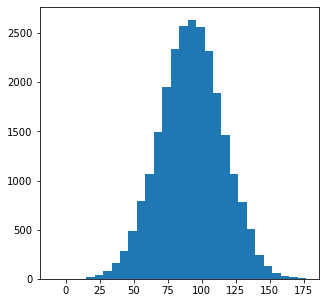

In [9]:
print('Для geo_0')
predict_0, rmse_0, y_valid_0 = finished_model(geo_0)


Для geo_1
Средний запас предсказанного сырья: 68.7 тыс. баррелей
RMSE равен: 0.89 тыс. баррелей


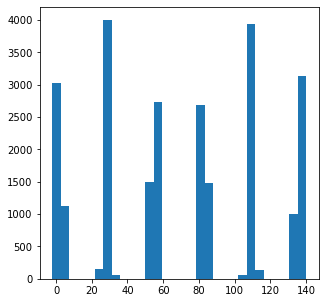

In [10]:
print('Для geo_1')
predict_1, rmse_1, y_valid_1 = finished_model(geo_1)

Для geo_2
Средний запас предсказанного сырья: 94.8 тыс. баррелей
RMSE равен: 40.1 тыс. баррелей


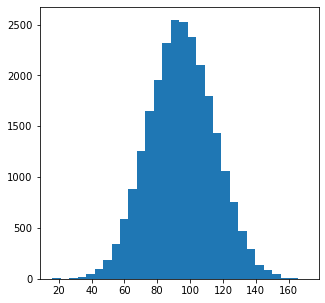

In [11]:
print('Для geo_2')
predict_2, rmse_2, y_valid_2 = finished_model(geo_2)

## Подготовка к расчету прибыли

**Условия задачи:**  
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.  
Бюджет на разработку скважин в регионе — 10 млрд рублей.  
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.  
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.  

In [12]:
to_null = int(10e9 / 450000 / 200) +1
print(f'Чтобы выйти в ноль по скважине, необходимо в среднем {to_null} тыс.баррелей нефти на скважину в регионе')

Чтобы выйти в ноль по скважине, необходимо в среднем 112 тыс.баррелей нефти на скважину в регионе


In [13]:
i=0
for j in [predict_0, predict_1, predict_2]:
    if j.mean() < to_null:
        print(f'Регион {i} убыточен на {int((to_null - j.mean()))} тыс.барелей/скважина')
        i+=1
    else:
        print(f'В регионе {i} прибыль составит {int(j.mean() - to_null)} тыс.баррелей на скважину')

Регион 0 убыточен на 19 тыс.барелей/скважина
Регион 1 убыточен на 43 тыс.барелей/скважина
Регион 2 убыточен на 17 тыс.барелей/скважина


### Вывод

Судя по предсказаниям в среднем, все районы убыточны, но как мы видели на гистограммах, есть достаточно большой шанс выбрать только лучшие скважины, которые содержат нефти больше безубыточного минимума

## Расчет прибыли по регионам

In [14]:
# функция подсчитывает прибыль с региона
def profit(predict, y_valid):
    best_predict = predict.sort_values().tail(200)
    y_best = y_valid[best_predict.index]
    profit = y_best.sum() *450000 - 10000000000
    return profit

In [15]:
state = np.random.RandomState(42)

In [16]:
# собственно, бутстрап для подсчета вероятной прибыли с региона, доверительного интервала и рисков
def bootstrap(y_valid, predict):
    values = []
    risk=0
    for i in range(1000):
        y_subsample = y_valid_0.sample(500, replace=True, random_state=state)
        pred_subsample = predict_0[y_subsample.index]
        prof = profit(pred_subsample, y_subsample)
        values.append(prof)
        if prof < 0:
            risk += 1
    risk /= 1000
    values = pd.Series(values)
    mean = values.mean()
    upper = values.quantile(0.975)
    lower = values.quantile(0.025)
    return risk, mean, lower, upper

Теперь, когда все функции готовы, применим их на всех регионах

In [17]:
predicts = [predict_0,predict_1,predict_2]
y_valids = [y_valid_0,y_valid_1,y_valid_2]
i=0
for predict, y_valid in zip(predicts, y_valids):
    risk, mean, lower, upper = bootstrap(y_valid, predict)
    print(f'Для региона {i}')
    print('')
    print(f'Средняя прибыль равна: {mean/1e6:.4} млн.рублей')
    print(f'Доверительный интервал от {lower/10e5:.4} млн.рублей до {upper/10e5:.5} млн.рублей')
    print(f'Риск убытков равен:{risk:.2%}')
    print('-----------------')
    i+=1


Для региона 0

Средняя прибыль равна: 606.1 млн.рублей
Доверительный интервал от 10.09 млн.рублей до 1246.4 млн.рублей
Риск убытков равен:2.50%
-----------------
Для региона 1

Средняя прибыль равна: 628.1 млн.рублей
Доверительный интервал от 65.42 млн.рублей до 1251.3 млн.рублей
Риск убытков равен:1.60%
-----------------
Для региона 2

Средняя прибыль равна: 612.2 млн.рублей
Доверительный интервал от 4.188 млн.рублей до 1262.1 млн.рублей
Риск убытков равен:2.50%
-----------------


### Вывод

Судя по условиям заказчика, после оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%.  
Таким образом нам подходит только регион-1, в котором:
* Средняя прибыль равна: 628.1 млн.рублей
* Доверительный интервал от 65.42 млн.рублей до 1251.3 млн.рублей
* Риск убытков равен:1.60%

## Выводы

Мы изучили данные, провели их предобработку, обучили модель предсказывать объем нефти в скважине, после чего с помощью bootstrap провели тесты и выявили наиболее прибыльный регион, которым оказался регион-1, так как у него наибольший потенциал прибыли при наименьших рисках